In [7]:
import hydrobr
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from plotly.offline import plot
from PIL import Image
import geopandas as gpd
from shapely.geometry import Point

In [6]:
area = gpd.read_file(r'G:\My Drive\Doutorado\TESE\2. Artigo 2\Artigo Pantanal - LULCC\Codes\pantanal-lc\2024_reviews\merged_precip\UPRB.shp')

In [22]:
# All rainfall data from ANA in the country:

In [8]:
# To get the list of prec stations - source='ANAF' is the standart
list_stations = hydrobr.get_data.ANA.list_prec_stations() 
# To show the first five rows of the data
list_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11976 entries, 0 to 11975
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         11976 non-null  object 
 1   Code         11976 non-null  object 
 2   Type         11976 non-null  int64  
 3   SubBasin     11976 non-null  int64  
 4   City         11975 non-null  object 
 5   State        11976 non-null  object 
 6   Responsible  11976 non-null  object 
 7   Latitude     11976 non-null  float64
 8   Longitude    11976 non-null  float64
 9   StartDate    11976 non-null  object 
 10  EndDate      11976 non-null  object 
 11  NYD          11976 non-null  int64  
 12  MD           11976 non-null  float64
 13  N_YWOMD      11976 non-null  int64  
 14  YWMD         11976 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.4+ MB


In [9]:
# Stations inside the basin:

In [12]:
stations = [
    "01456001",
    "01456003",
    "01456009",
    "01457000",
    "01457001",
    "01554006",
    "01556000",
    "01556001",
    "01556002",
    "01556006",
    "01557001",
    "01557003",
    "01558000",
    "01558001",
    "01558004",
    "01558005",
    "01654000",
    "01654001",
    "01655000",
    "01655001",
    "01655002",
    "01655004",
    "01656001",
    "01656002",
    "01656003",
    "01656004",
    "01657000",
    "01657002",
    "01657003",
    "01657004",
    "01658000",
    "01754000",
    "01754002",
    "01754004",
    "01755003",
    "01756000",
    "01756001",
    "01756003",
    "01757001",
    "01853000",
    "01853002",
    "01854001",
    "01854002",
    "01854003",
    "01854004",
    "01857001",
    "01857003",
    "01954002",
    "01954003",
    "01954004",
    "01956003",
    "01956004",
    "01956005",
    "01957000",
    "01957003",
    "01957004",
    "01957005",
    "01957006",
    "02054000",
    "02054005",
    "02055000",
    "02055001",
    "02055002",
    "02056001",
    "02056003",
    "02056005",
    "02155001",
    "02156000",
    "02156001",
    "02157003",
    "02157004",
    "02256001",
    "02257000"
]

In [13]:
# Criando uma lista de geometrias no formato de ponto
pontos = [Point(x) for x in zip(list_stations.Longitude,
                                list_stations.Latitude)]

# Definindo o sistema de coordenadas
crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True} 
# Criando o geodataframe
list_stations_geo = gpd.GeoDataFrame(list_stations, geometry=pontos,crs=crs)

In [14]:
# Selecionando os indices das estações que estão dentro da bacia
indices = list_stations_geo.geometry.within(area.geometry[0])
# Filtrando as estações
lista_selecionada = list_stations_geo[indices]
#Obtendo as informações
lista_selecionada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 193 entries, 4934 to 9009
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         193 non-null    object  
 1   Code         193 non-null    object  
 2   Type         193 non-null    int64   
 3   SubBasin     193 non-null    int64   
 4   City         193 non-null    object  
 5   State        193 non-null    object  
 6   Responsible  193 non-null    object  
 7   Latitude     193 non-null    float64 
 8   Longitude    193 non-null    float64 
 9   StartDate    193 non-null    object  
 10  EndDate      193 non-null    object  
 11  NYD          193 non-null    int64   
 12  MD           193 non-null    float64 
 13  N_YWOMD      193 non-null    int64   
 14  YWMD         193 non-null    float64 
 15  geometry     193 non-null    geometry
dtypes: float64(4), geometry(1), int64(4), object(7)
memory usage: 25.6+ KB


In [15]:
# Selecionando os códigos das estações
codigos = lista_selecionada.Code.to_list()
dados_precip = hydrobr.get_data.ANA.prec_data(codigos)

  0%|          | 0/193 [00:00<?, ?it/s]C:\Users\cb3910\AppData\Roaming\Python\Python312\site-packages\hydrobr\get_data.py:177: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df)
  1%|          | 2/193 [00:49<1:18:14, 24.58s/it]C:\Users\cb3910\AppData\Roaming\Python\Python312\site-packages\hydrobr\get_data.py:177: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df)
  2%|▏         | 4/193 [01:34<1:12:25, 22.99s/it]C:\Users\cb3910\AppData\Roaming\Python\Python312\site-pac

In [ ]:
dados_precip.to_csv('Precip_ANA_stations.csv', sep=',')

In [ ]:
dados_precip.info()
dados_precip.head()

Stations with more than 50 years of data:

In [30]:
# Extract the code, latitude, and longitude columns into a new DataFrame
extracted_data = selected_entries[['Latitude', 'Longitude']]

# Convert the extracted data to a list
extracted_list = extracted_data.values.tolist()

In [33]:
# Create an empty dictionary to store the extracted data
extracted_dict = {}

# Iterate over each row in the DataFrame
for index, row in selected_entries.iterrows():
    code = row['Code']
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    # Add the code as key and latitude, longitude as values to the dictionary
    extracted_dict[code] = (latitude, longitude)

In [ ]:
extracted_dict

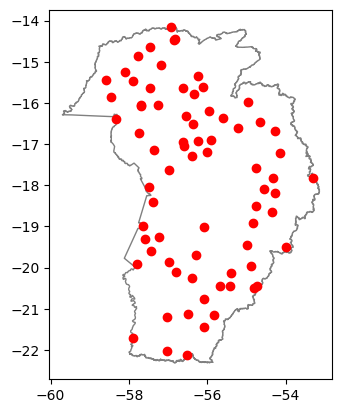

In [27]:
base = area.plot(color='white', edgecolor='grey')
selected_entries.plot(ax=base,marker='o',color='red')

# Add labels to the points
"""for x, y, label in zip(selected_entries.geometry.x, selected_entries.geometry.y, selected_entries['Code']):
    plt.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')"""

# Display the plot
plt.show()

## Calculating the values for the hydrologycal year 
Hydrologycal years starts in September 

In [23]:
hidro_months = ['5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4']

In [24]:
from itertools import cycle, islice

In [25]:
df_monthly["hydro_month"] = list(islice(cycle(hidro_months), len(df_monthly)))

In [26]:
df_monthly.head(10)

01454002  01454003  01455000  01455001  01455002  01455003  \
Year Month                                                               
1981 1           0.0       0.0       0.0       0.0       0.0       0.0   
     2           0.0       0.0       0.0       0.0     202.5       0.0   
     3           0.0       0.0       0.0       0.0     217.7       0.0   
     4           0.0       0.0       0.0       0.0      28.6       0.0   
     5           0.0       0.0       0.0       0.0      45.1       0.0   
     6           0.0       0.0       0.0       0.0     102.0       0.0   
     7           0.0       0.0       0.0       0.0       0.0       0.0   
     8           0.0       0.0       0.0       0.0       0.0       0.0   
     9           0.0       0.0       0.0       0.0       8.1       0.0   
     10          0.0       0.0       0.0       0.0     127.6       0.0   

            01455004  01455006  01455007  01455008  ...  02157002  02157003  \
Year Month                                          ...                       
1981 1         446.2       0.0       0.0       0.0  ...       0.0     357.6   
     2         114.3       0.0       0.0     196.5  ...       0.0     259.3   
     3         272.5       0.0       0.0     214.9  ...       0.0     113.0   
     4          82.8       0.0       0.0      28.6  ...       0.0      92.7   
     5          33.2       0.0       0.0      45.1  ...       0.0      47.7   
     6          32.5       0.0       0.0     102.0  ...       0.0       0.0   
     7           0.0       0.0       0.0       0.0  ...       0.0      35.1   
     8           0.9       0.0       0.0       0.0  ...       0.0      45.7   
     9          73.6       0.0       0.0       8.1  ...       0.0     129.9   
     10          7.1       0.0       0.0      67.6  ...       0.0      74.4   

            02157004  02157005  02157006  02256000  02256001  02257000  \
Year Month                                                               
1981 1           0.0      66.7       5.0       0.0      84.8     129.4   
     2           0.0     108.4      63.0       0.0     140.4     154.3   
     3           0.0      26.8      31.0       0.0     165.9      89.3   
     4           0.0     107.8     133.0       0.0     136.2     106.8   
     5           0.0      13.9       0.0       0.0      27.0      42.9   
     6           0.0     112.4      72.5       0.0      93.0     122.5   
     7           0.0       0.1       0.0       0.0       5.2       1.7   
     8           0.0      21.6      52.0       0.0      34.6      28.0   
     9           0.0      32.2       0.0       0.0      30.5      23.2   
     10          0.0      87.0       0.0       0.0     118.0     125.2   

            02257001  hydro_month  
Year Month                         
1981 1           0.0            5  
     2           0.0            6  
     3           0.0            7  
     4           0.0            8  
     5           0.0            9  
     6           0.0           10  
     7           0.0           11  
     8           0.0           12  
     9           0.0            1  
     10          0.0            2  

[10 rows x 194 columns]

In [27]:
df_monthly = df_monthly.drop(df_monthly.index[:8])

In [28]:
df_monthly.head()

01454002  01454003  01455000  01455001  01455002  01455003  \
Year Month                                                               
1981 9           0.0       0.0       0.0       0.0       8.1       0.0   
     10          0.0       0.0       0.0       0.0     127.6       0.0   
     11          0.0       0.0       0.0       0.0     218.5       0.0   
     12          0.0       0.0       0.0       0.0     162.4       0.0   
1982 1           0.0       0.0       0.0       0.0       0.0       0.0   

            01455004  01455006  01455007  01455008  ...  02157002  02157003  \
Year Month                                          ...                       
1981 9          73.6       0.0       0.0       8.1  ...       0.0     129.9   
     10          7.1       0.0       0.0      67.6  ...       0.0      74.4   
     11        138.5       0.0       0.0     194.2  ...       0.0     148.7   
     12          0.0       0.0       0.0     160.4  ...       0.0     274.4   
1982 1         194.3       0.0     194.3     195.2  ...       0.0      68.0   

            02157004  02157005  02157006  02256000  02256001  02257000  \
Year Month                                                               
1981 9           0.0      32.2       0.0       0.0      30.5      23.2   
     10          0.0      87.0       0.0       0.0     118.0     125.2   
     11          0.0     160.6      66.0       0.0     141.6     224.7   
     12          0.0     289.0     444.4       0.0     388.4     244.7   
1982 1           0.0      34.1       0.0       0.0      52.0      29.5   

            02257001  hydro_month  
Year Month                         
1981 9           0.0            1  
     10          0.0            2  
     11          0.0            3  
     12          0.0            4  
1982 1           0.0            5  

[5 rows x 194 columns]

In [29]:
years = [str(num) for num in range(1982, 2023) for _ in range(12)]

In [30]:
df_monthly["hydro_year"] = list(islice(cycle(years), len(df_monthly)))

In [31]:
df_monthly['hydro_year'] = df_monthly['hydro_year'].astype(int)

In [32]:
df_monthly.head()

01454002  01454003  01455000  01455001  01455002  01455003  \
Year Month                                                               
1981 9           0.0       0.0       0.0       0.0       8.1       0.0   
     10          0.0       0.0       0.0       0.0     127.6       0.0   
     11          0.0       0.0       0.0       0.0     218.5       0.0   
     12          0.0       0.0       0.0       0.0     162.4       0.0   
1982 1           0.0       0.0       0.0       0.0       0.0       0.0   

            01455004  01455006  01455007  01455008  ...  02157003  02157004  \
Year Month                                          ...                       
1981 9          73.6       0.0       0.0       8.1  ...     129.9       0.0   
     10          7.1       0.0       0.0      67.6  ...      74.4       0.0   
     11        138.5       0.0       0.0     194.2  ...     148.7       0.0   
     12          0.0       0.0       0.0     160.4  ...     274.4       0.0   
1982 1         194.3       0.0     194.3     195.2  ...      68.0       0.0   

            02157005  02157006  02256000  02256001  02257000  02257001  \
Year Month                                                               
1981 9          32.2       0.0       0.0      30.5      23.2       0.0   
     10         87.0       0.0       0.0     118.0     125.2       0.0   
     11        160.6      66.0       0.0     141.6     224.7       0.0   
     12        289.0     444.4       0.0     388.4     244.7       0.0   
1982 1          34.1       0.0       0.0      52.0      29.5       0.0   

            hydro_month  hydro_year  
Year Month                           
1981 9                1        1982  
     10               2        1982  
     11               3        1982  
     12               4        1982  
1982 1                5        1982  

[5 rows x 195 columns]

In [33]:
df_monthly = df_monthly.drop(df_monthly.tail(5).index)

In [34]:
df_monthly.tail(10)

01454002  01454003  01455000  01455001  01455002  01455003  \
Year Month                                                               
2021 11        341.0       0.0       0.0       0.0       0.0       0.0   
     12        395.8       0.0       0.0       0.0       0.0       0.0   
2022 1         200.6       0.0       0.0       0.0       0.0       0.0   
     2         351.8       0.0       0.0       0.0       0.0       0.0   
     3         170.1       0.0       0.0       0.0       0.0       0.0   
     4          40.0       0.0       0.0       0.0       0.0       0.0   
     5           0.0       0.0       0.0       0.0       0.0       0.0   
     6          15.4       0.0       0.0       0.0       0.0       0.0   
     7           0.0       0.0       0.0       0.0       0.0       0.0   
     8           0.0       0.0       0.0       0.0       0.0       0.0   

            01455004  01455006  01455007  01455008  ...  02157003  02157004  \
Year Month                                          ...                       
2021 11          0.0       0.0       0.0     152.2  ...     157.8      21.4   
     12          0.0       0.0       0.0     348.6  ...      41.3      34.9   
2022 1           0.0       0.0       0.0     335.7  ...      78.6     123.3   
     2           0.0       0.0       0.0     284.6  ...      45.5      49.1   
     3           0.0       0.0       0.0     256.2  ...     139.7     173.7   
     4           0.0       0.0       0.0      92.3  ...      75.1      99.2   
     5           0.0       0.0       0.0       0.0  ...     147.3     125.5   
     6           0.0       0.0       0.0      24.7  ...      47.6       4.3   
     7           0.0       0.0       0.0       0.0  ...       0.0       0.0   
     8           0.0       0.0       0.0      28.8  ...      27.0      53.8   

            02157005  02157006  02256000  02256001  02257000  02257001  \
Year Month                                                               
2021 11        218.7       0.0       0.0     106.1     113.1      45.0   
     12          0.0       0.0       0.0      28.4      49.1      29.0   
2022 1          84.0       0.0       0.0     107.1     110.8     111.1   
     2          81.8       0.0       0.0      12.7      28.3       1.8   
     3         132.0       0.0       0.0     282.6     177.8      96.4   
     4         119.5       0.0       0.0      97.6      47.3      30.0   
     5         140.0       0.0       0.0     163.4     111.8       0.0   
     6          11.0       0.0       0.0      32.6       3.7       7.0   
     7           0.0       0.0       0.0       0.0       0.0       0.0   
     8         204.5       0.0       0.0      66.6      65.4       0.0   

            hydro_month  hydro_year  
Year Month                           
2021 11               3        2022  
     12               4        2022  
2022 1                5        2022  
     2                6        2022  
     3                7        2022  
     4                8        2022  
     5                9        2022  
     6               10        2022  
     7               11        2022  
     8               12        2022  

[10 rows x 195 columns]

In [35]:
df_monthly = df_monthly.groupby(['hydro_year']).sum()

C:\Users\cassi\AppData\Local\Temp\ipykernel_6072\1246646707.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [36]:
# Replace 0 values with NaN
df_monthly = df_monthly.replace(0, np.nan)

In [37]:
df_monthly

,01454002,01454003,01455000,01455001,01455002,01455003,01455004,01455006,01455007,01455008,...,02157000,02157002,02157003,02157004,02157005,02157006,02256000,02256001,02257000,02257001
hydro_year,,,,,,,,,,,,,,,,,,,,,
1982,NaN,NaN,NaN,NaN,516.6,NaN,1093.8,NaN,874.6,945.50,...,764.1,NaN,1511.9,NaN,1545.7,540.4,NaN,1652.1,1492.6,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,1345.6,790.3,1345.8,980.30,...,NaN,NaN,1719.0,385.20,2171.5,1812.8,NaN,1960.0,1989.8,NaN
1984,1608.5,NaN,NaN,NaN,NaN,NaN,1706.1,1725.4,1707.1,1696.60,...,273.6,NaN,267.0,NaN,611.0,435.4,NaN,599.2,667.6,NaN
1985,1879.7,NaN,NaN,NaN,NaN,NaN,1423.2,1522.9,1564.8,1573.10,...,1475.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,2356.6,NaN,NaN,NaN,NaN,NaN,1302.4,408.8,618.3,1032.70,...,1087.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1773.3,NaN,NaN,NaN,NaN,NaN,1347.6,615.6,1282.4,1479.80,...,1478.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2349.6,1166.20,NaN,NaN,NaN,NaN,759.7,1534.1,1577.6,1670.00,...,1093.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,1521.3,1898.60,NaN,NaN,NaN,NaN,562.7,2266.1,1772.0,2014.10,...,1187.0,NaN,527.8,1057.70,1134.6,NaN,NaN,292.2,126.8,NaN
1990,634.0,1248.70,NaN,NaN,NaN,NaN,NaN,1258.9,1613.8,605.80,...,NaN,NaN,NaN,285.50,NaN,NaN,NaN,323.6,NaN,NaN


In [38]:
data_stations_index = df_monthly.reset_index()

In [ ]:
data_stations_index

In [40]:
data_stations_index.to_csv('dados_chuvaANA_UPRB_anual.csv', sep=';')